# Introduction

I am an analyst at a big online store. Together with the marketing
department, i've compiled a list of hypotheses that may help boost
revenue.
My job is to prioritize these hypotheses, launch an A/B test, and analyze the
results.

## Description of the data:

#### hypotheses_us.csv
Hypotheses — brief descriptions of the hypotheses

Reach — user reach, on a scale of one to ten

Impact — impact on users, on a scale of one to ten

Confidence — confidence in the hypothesis, on a scale of one to ten

Effort — the resources required to test a hypothesis, on a scale of one to
ten. The higher the Effort value, the more resource-intensive the test.


#### orders_us.csv
transactionId — order identifier

visitorId — identifier of the user who placed the order

date — of the order

revenue — from the order

group — the A/B test group that the user belongs to

#### visits_us.csv
date — date

group — A/B test group

visits — the number of visits on the date specified in the A/B test group
specified


# Step 1: Reading and preprocessing the data:

Importing the libaries:

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import datetime as dt

Reading the data:

In [2]:
try:
    hypothesis = pd.read_csv(r'C:\Users\nadav\OneDrive\מסמכים\Practicum100\databases\hypotheses_us.csv')
except:
    hypothesis = pd.read_csv('/datasets/hypotheses_us.csv')

In [3]:
try:
    orders = pd.read_csv(r'C:\Users\nadav\OneDrive\מסמכים\Practicum100\databases\orders.csv')
except:
    orders = pd.read_csv('/datasets/orders_us.csv')

In [4]:
try:
    visits = pd.read_csv(r'C:\Users\nadav\OneDrive\מסמכים\Practicum100\databases\visits.csv')
except:
    visits = pd.read_csv('/datasets/hypotheses_us.csv')

Let's take a look at the data:

In [5]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 1 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Hypothesis;Reach;Impact;Confidence;Effort  9 non-null      object
dtypes: object(1)
memory usage: 200.0+ bytes


In [6]:
hypothesis

,Hypothesis;Reach;Impact;Confidence;Effort
0,Add two new channels for attracting traffic. T...
1,Launch your own delivery service. This will sh...
2,Add product recommendation blocks to the store...
3,Change the category structure. This will incre...
4,Change the background color on the main page. ...
5,Add a customer review page. This will increase...
6,Show banners with current offers and sales on ...
7,Add a subscription form to all the main pages....
8,Launch a promotion that gives users discounts ...


Looks like this data source needs pharsing. Let's re-read it:

In [7]:
try:
    hypothesis = pd.read_csv(r'C:\Users\nadav\OneDrive\מסמכים\Practicum100\databases\hypotheses_us.csv', sep = ';')
except:
    hypothesis = pd.read_csv('/datasets/hypotheses_us.csv', sep = ';')

In [8]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


Much better!

In [9]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


All looks good here. No missing values and no duplicates.

In [10]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [11]:
visits

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


Looks like everything is ok here. Let's check for duplicates:

In [12]:
visits.duplicated().sum()

0

Great!

In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [14]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


Looks like there is no missing values. Let's check for duplicates:

In [15]:
orders.duplicated().sum()

0

No duplicates.

Let's check if we have users who are accidently on both groups:

In [16]:
ordersgroupA = orders[orders['group'] == 'A']
ordersgroupB = orders[orders['group'] == 'B']
ordersgroupA['visitorId'].isin(ordersgroupB['visitorId']).sum()

89

We see we have 89 users that are on both groups! Let's delete them:

In [17]:
duplicates = ordersgroupA[ordersgroupA['visitorId'].isin(ordersgroupB['visitorId']) == True]['visitorId'].index
orders = orders.drop(duplicates, axis = 0).reset_index(drop = True)

In [18]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1108 non-null   int64  
 1   visitorId      1108 non-null   int64  
 2   date           1108 non-null   object 
 3   revenue        1108 non-null   float64
 4   group          1108 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 43.4+ KB


Got rid of that. Let's turn our column types:

In [19]:
orders['date'] = pd.to_datetime(orders['date'],format = '%Y-%m-%d')
visits['date'] = pd.to_datetime(visits['date'],format = '%Y-%m-%d')

In [20]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1108 non-null   int64         
 1   visitorId      1108 non-null   int64         
 2   date           1108 non-null   datetime64[ns]
 3   revenue        1108 non-null   float64       
 4   group          1108 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 43.4+ KB


In [21]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Let's check if our dates are corresponding:

In [22]:
orders['date'].min()

Timestamp('2019-08-01 00:00:00')

In [23]:
visits['date'].min()

Timestamp('2019-08-01 00:00:00')

In [24]:
orders['date'].max()

Timestamp('2019-08-31 00:00:00')

In [25]:
visits['date'].max()

Timestamp('2019-08-31 00:00:00')

Our dates correspond too. Looks like the data is ready!

# Part 1. Prioritizing Hypotheses

First, Let's sort our hypotheses by the 'ICE' method:\

In [26]:
pd.set_option('display.max_colwidth', None)
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Effort']
hypothesis[['Hypothesis','ICE']].sort_values(by = 'ICE', ascending = False)

,Hypothesis,ICE
8,Launch a promotion that gives users discounts on their birthdays,16.200000
0,Add two new channels for attracting traffic. This will bring 30% more users,13.333333
7,Add a subscription form to all the main pages. This will help you compile a mailing list,11.200000
6,Show banners with current offers and sales on the main page. This will boost conversion,8.000000
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,7.000000
1,Launch your own delivery service. This will shorten delivery time,2.000000
5,Add a customer review page. This will increase the number of orders,1.333333
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,1.125000
4,Change the background color on the main page. This will increase user engagement,1.000000


Now let's check with the RICE method:

In [27]:
hypothesis['RICE'] = hypothesis['Impact'] * hypothesis['Confidence'] * hypothesis['Reach'] / hypothesis['Effort']
hypothesis[['Hypothesis','RICE']].sort_values(by = 'RICE', ascending = False)

,Hypothesis,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,40.0
8,Launch a promotion that gives users discounts on their birthdays,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,9.0
1,Launch your own delivery service. This will shorten delivery time,4.0
5,Add a customer review page. This will increase the number of orders,4.0
4,Change the background color on the main page. This will increase user engagement,3.0


We see there is a significant differnce between the two methods. This is because RICE takes into account the amount of users that will be affected by the change, while ICE dosen't. RICE will be more accurate in terms of income, because it takes into account more parameters. 

# Conclusion:

In my analysis I discovered that if we calculate the ICE score of our hypotheses, we should test hypothesis 8. However, If we calculate the RICE score, we should test hypothesis 7.

I can reccomend the following:

If we are trying to generaly improve our website and attract new audiences, we should try hypothesis 8. However, If we want to boost revenue from our existing customer base we should test hypothesis 7.

# Part 2: A/B Test Analysis

### Cumulative revenue by group

Creating a table for comparison:

In [28]:
Datesgroups = orders[['date','group']].drop_duplicates()
Datesgroups

,date,group
0,2019-08-15,B
6,2019-08-15,A
40,2019-08-16,A
42,2019-08-16,B
50,2019-08-01,A
...,...,...
991,2019-08-12,A
1032,2019-08-13,B
1034,2019-08-13,A
1067,2019-08-14,B


Calculating cumulative revenue:

In [29]:
CumulativeRevenue = (
    Datesgroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
    .agg({'date': 'max', 'group': 'max', 'transactionId': pd.Series.nunique, 'visitorId': pd.Series.nunique, 'revenue': 'sum'}), axis=1)
.sort_values(by = ['date','group'])
)

Plotting graphs:

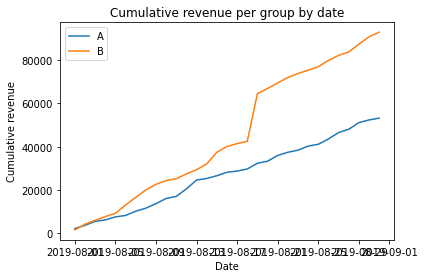

In [30]:
cumulativeRevenueA = CumulativeRevenue[CumulativeRevenue['group'] == 'A'][['date','revenue','transactionId']]
cumulativeRevenueB = CumulativeRevenue[CumulativeRevenue['group'] == 'B'][['date','revenue', 'transactionId']]
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label = 'A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label = 'B')
plt.legend()
plt.title("Cumulative revenue per group by date")
plt.ylabel("Cumulative revenue")
plt.xlabel("Date");

We can see that group A's revenue is steadily going up. This is a good sign. Group B, on the other hand, has a spike in the revenue graph, which means that there probably are outliners there we need to eliminate.

### Cumulative average order size by group

Plotting graphs:

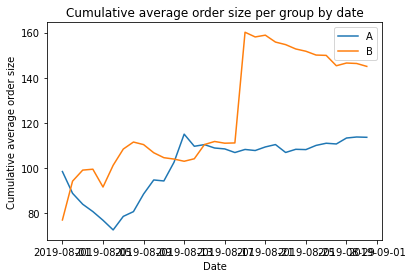

In [31]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['transactionId'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['transactionId'], label='B')
plt.legend() 
plt.title("Cumulative average order size per group by date")
plt.ylabel("Cumulative average order size")
plt.xlabel("Date");

We can see that in both cases, the average order size steadies towards the end of the test. But we still need more data on both groups: We see that group A has a low average at the begining, and group B has a huge spike in the average order.

###  Relative difference in cumulative average order size for group B compared with group A

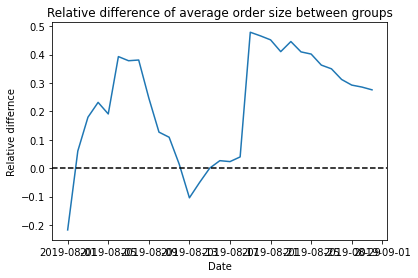

In [32]:
mergedCumulativeRevenue = pd.merge(cumulativeRevenueA,cumulativeRevenueB,left_on = 'date', right_on = 'date', how = 'left', suffixes = ['A','B'])
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB'] / mergedCumulativeRevenue['transactionIdB']) / (mergedCumulativeRevenue['revenueA'] / mergedCumulativeRevenue['transactionIdA']) -1)
plt.axhline(y = 0,color = 'black', linestyle = '--')
plt.title("Relative difference of average order size between groups")
plt.xlabel("Date")
plt.ylabel("Relative differnce");

We can see several peaks and changes. This means there probably are significant outliners that we need to eliminate before we draw conclusions.

# Daily conversion rate

Now lets find how many orders occured on each day for each group:

In [33]:
converted = orders.groupby(['date','group']).agg({'transactionId': 'count'}).reset_index()
converted.columns = ['date','group','number_of_orders']
converted

,date,group,number_of_orders
0,2019-08-01,A,23
1,2019-08-01,B,21
2,2019-08-02,A,19
3,2019-08-02,B,24
4,2019-08-03,A,24
...,...,...,...
57,2019-08-29,B,20
58,2019-08-30,A,9
59,2019-08-30,B,24
60,2019-08-31,A,8


Let's merge the visits table:

In [34]:
converted = pd.merge(converted,visits, left_on = ['date','group'], right_on = ['date','group'])
converted

,date,group,number_of_orders,visits
0,2019-08-01,A,23,719
1,2019-08-01,B,21,713
2,2019-08-02,A,19,619
3,2019-08-02,B,24,581
4,2019-08-03,A,24,507
...,...,...,...,...
57,2019-08-29,B,20,531
58,2019-08-30,A,9,490
59,2019-08-30,B,24,490
60,2019-08-31,A,8,699


Now let's calculate conversion:

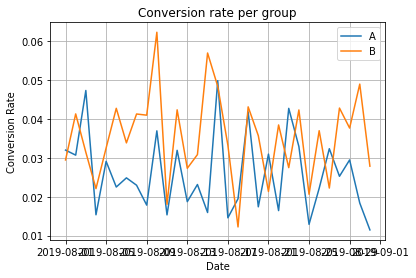

In [35]:
converted['conversion'] = converted['number_of_orders'] / converted['visits']
convertedA = converted[converted['group'] == 'A'][['date','conversion']]
convertedB = converted[converted['group'] == 'B'][['date','conversion']]
plt.plot(convertedA['date'], convertedA['conversion'], label = 'A')
plt.plot(convertedB['date'], convertedB['conversion'], label = 'B')
plt.legend()
plt.title("Conversion rate per group")
plt.xlabel("Date")
plt.ylabel("Conversion Rate")
plt.grid();

We can see in general, group B has a better conversion rate than group A. We can see there are lot's of spikes in the data, So let's calculate cumulative conversion:

In [36]:
cumulatedVisits = (
    Datesgroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])]
    .agg({'date': 'max', 'group': 'max', 'visits': 'sum'}), axis=1)
.sort_values(by = ['date','group'])
)
cumulatedVisits

,date,group,visits
50,2019-08-01,A,719
61,2019-08-01,B,713
163,2019-08-02,A,1338
161,2019-08-02,B,1294
265,2019-08-03,A,1845
...,...,...,...
461,2019-08-29,B,17708
700,2019-08-30,A,18037
639,2019-08-30,B,18198
890,2019-08-31,A,18736


In [37]:
cumulatedData = pd.merge(CumulativeRevenue,cumulatedVisits, right_on = ['date','group'], left_on = ['date','group'])
cumulatedData

,date,group,transactionId,visitorId,revenue,visits
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,21,20,1620.0,713
2,2019-08-02,A,42,36,3734.9,1338
3,2019-08-02,B,45,43,4243.8,1294
4,2019-08-03,A,66,60,5550.1,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,87343.0,17708
58,2019-08-30,A,460,437,52363.7,18037
59,2019-08-30,B,620,567,90736.3,18198
60,2019-08-31,A,468,445,53212.0,18736


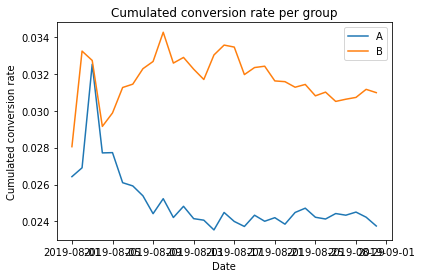

In [38]:
cumulatedData['conversion'] = cumulatedData['visitorId'] / cumulatedData['visits']
cumulatedConversionA = cumulatedData[cumulatedData['group'] == 'A'][['date','conversion']]
cumulatedConversionB = cumulatedData[cumulatedData['group'] == 'B'][['date','conversion']]
plt.plot(cumulatedConversionA['date'], cumulatedConversionA['conversion'], label = 'A')
plt.plot(cumulatedConversionB['date'], cumulatedConversionB['conversion'], label = 'B')
plt.legend()
plt.title("Cumulated conversion rate per group")
plt.xlabel("Date")
plt.ylabel("Cumulated conversion rate");

Here, We can definetly see that group B's average conversion rate is much higher on average than group A.

### Number of orders per user

Let's find the number of orders per user, so we can detect annomalies:

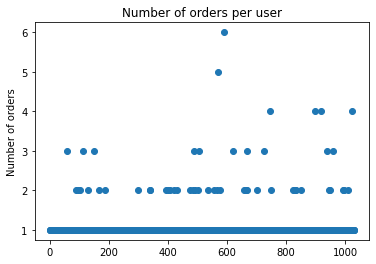

In [39]:
orders_per_user = orders.groupby('visitorId').agg({'transactionId': 'count'}).reset_index()
orders_per_user.columns = ['visitorId', 'number_of_orders']
x_values = pd.Series(range(0, len(orders_per_user)))
plt.scatter(x_values, orders_per_user['number_of_orders'])
plt.title("Number of orders per user")
plt.ylabel("Number of orders");

We can see that the vast majority of users buy only once. Only a selected few buy more than 2 times.

### Number of orders per user percentiles:

Let's calculate the number of orders per user's 95th and 99th percentiles:

In [40]:
np.percentile(orders_per_user['number_of_orders'],[95,99])

array([1.5, 3. ])

We see that 99% bought less than 3 products. Let's define that users who bought over 3 products are annomalies.

### Order prices

Let's check the distribution of order prices:

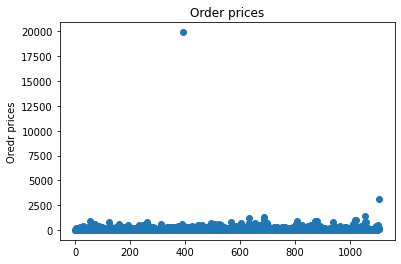

In [41]:
x_values = pd.Series(range(0,len(orders)))
plt.scatter(x_values,orders['revenue'])
plt.title("Order prices")
plt.ylabel("Oredr prices");

We can see that all our order prices are way bellow 2500, but we have a couple who have had huge orders.

### Percentiles:

Let's check the order price's percentiles:

In [42]:
np.percentile(orders['revenue'],[95,99])

array([435.63 , 872.336])

We see that 99% of orders were less then 873 dollars. It's safe to say we can define our annomalies at orders above 1000 dollars.

### Statistical significance of the difference in conversion rates(raw data):

Let's check how our groups statisticlly differ. To do this, we need to create samples:

In [72]:
OrderByuserA = orders[orders['group'] == 'A'].groupby('visitorId', as_index = False).agg({'transactionId': pd.Series.nunique})
OrderByuserA.columns = ['visitorId', 'orders']
OrderByuserB = orders[orders['group'] == 'B'].groupby('visitorId', as_index = False).agg({'transactionId': pd.Series.nunique})
OrderByuserB.columns = ['visitorId', 'orders']

In [76]:
SampleA = pd.concat([OrderByuserA['orders'],pd.Series(0, index = np.arange(visits[visits['group'] == 'A']['visits'].sum() - len(OrderByuserA['orders'])),name = 'orders')],axis = 0)
SampleB = pd.concat([OrderByuserB['orders'],pd.Series(0, index = np.arange(visits[visits['group'] == 'B']['visits'].sum() - len(OrderByuserA['orders'])),name = 'orders')],axis = 0)

In [78]:
SampleA

0        1
1        1
2        1
3        1
4        1
        ..
18286    0
18287    0
18288    0
18289    0
18290    0
Name: orders, Length: 18736, dtype: int64

In [80]:
print('{0:.7f}'.format(stats.mannwhitneyu(SampleA,SampleB)[1]))

0.0000287


We see in analysing our raw data that there is a significant difference in conversion rate: Our p value is under 0.05,so we can reject the null hypothesis that the conversion rates are simillar. Let's check the differnce:

In [83]:
print('{0:.7f}'.format(SampleB.mean() / SampleA.mean() - 1))

0.3444866


We can see that group B's conversion rate is 34% higher than group A's conversion rate. This is a significant differnce. But it might be tampered by annomalies.

### Statistical significance of the difference in average order size(raw data):

In [87]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group'] == 'A']['revenue'], orders[orders['group'] == 'B']['revenue'])[1]))

0.736


The p value here is 0.7. This is higher than 0.05 so we can't reject the null hypothesis that the samples are the same. Let's check the differnce:

In [86]:
print('{0:.3f}'.format(orders[orders['group'] == 'A']['revenue'].mean() / orders[orders['group'] == 'B']['revenue'].mean() - 1))

-0.216


We can see that the average order size for group A is greater by 21%! This also might be tampered by annomalies.

### Statistical significance of the difference in conversion rates(filtered data):

Let's filter the data:

In [46]:
orders_per_user = orders_per_user.merge(orders[['visitorId','group']], on = 'visitorId', how = 'left')

In [90]:
ManyOrderUsers = orders_per_user[orders_per_user['number_of_orders'] >= 3]['visitorId']
BigOrderUsers = orders[orders['revenue'] > 1000]['visitorId']
AbnormalUsers = pd.concat([ManyOrderUsers, BigOrderUsers], axis = 0).drop_duplicates().sort_values()
print(AbnormalUsers)
print(AbnormalUsers.shape)

1018     148427295
59       249864742
119      457167155
156      611059232
687      888512513
1021    1164614297
1054    1307669133
394     1920142716
509     2038680547
1107    2108080724
530     2108163459
600     2378935119
627     2458001652
660     2587333274
712     2742574263
775     2988190573
795     3062433592
956     3717692402
979     3803269165
1002    3908431265
1028    3967698036
686     4133034833
1097    4256040402
632     4266935830
Name: visitorId, dtype: int64
(24,)


We see we have 24 abnormal users. Creating new samples:

In [88]:
FilteredSampleA = pd.concat([OrderByuserA[np.logical_not(OrderByuserA['visitorId'].isin(AbnormalUsers))]['orders'], pd.Series(0, index = np.arange(visits[visits['group'] == 'A']['visits'].sum() - len(OrderByuserA['orders'])),name = 'orders')],axis = 0)
FilteredSampleB = pd.concat([OrderByuserB[np.logical_not(OrderByuserB['visitorId'].isin(AbnormalUsers))]['orders'], pd.Series(0, index = np.arange(visits[visits['group'] == 'B']['visits'].sum() - len(OrderByuserB['orders'])),name = 'orders')],axis = 0)

Let's check statistical difference:

In [92]:
print('{0:.7f}'.format(stats.mannwhitneyu(FilteredSampleA,FilteredSampleB)[1]))

0.0000307


We can see that the assumptions from the raw data didn't change: There is a statistical difference between the conversion rates of the two samples. Let's check the difference: 

In [95]:
print('{0:.7f}'.format(FilteredSampleB.mean() / FilteredSampleA.mean() - 1))

0.3107611


We can see that group B's conversion rate is 31% higher than group A, Even after we've filtered the data. This is a significant difference.

### Statistical significance of the difference in average order size(filtered data):

In [98]:
(
print('{0:.3f}'.format(stats.mannwhitneyu(
orders[np.logical_and(orders['group'] == 'A',np.logical_not(orders['visitorId'].isin(AbnormalUsers)))]['revenue'],
orders[np.logical_and(orders['group'] == 'B',np.logical_not(orders['visitorId'].isin(AbnormalUsers)))]['revenue'])[1]))
)

0.992


We can see that the value is way above 0.05, which shows that the average order size is simillar, also in the filtered data. Le's check the difference:

In [101]:
(
print('{0:.3f}'.format(
orders[np.logical_and(orders['group'] == 'B',np.logical_not(orders['visitorId'].isin(AbnormalUsers)))]['revenue'].mean() / 
orders[np.logical_and(orders['group'] == 'A',np.logical_not(orders['visitorId'].isin(AbnormalUsers)))]['revenue'].mean() - 1))
)

-0.020


We can that the difference that we saw in the raw data has decreased significantly. Group A's average order size is only 2% grater than group B's, an unsignifical difference in statistic terms.

# Conclusion:

To sum up the analysis:
- We calculated the cumulative revenue, the cumulative order size and the ratio of the order size for both groups.
- We calculated conversion rate and cumulative conversion rate for both groups.
- We found annomalies in the data for orders per user and average order size.
- We messured the statistical significence of the difference in conversion rate and in average size, In both raw and filtered data.

My analysis shows that:
- Group A and Group B's cumulative revenue is pretty steady, with group B having a higher revenue throughout the whole test.
- Cumulative average orders steady towards the end of the test, with group B's average higher then group A's.
- Cumulative conversion rate also steadies towards the end of the test, with group B higher then group A.
- The annomalies in the data are users who order more then 3 times and users who order more then 1000 dollars.
- There is a major statistical significance difference in conversion rates: group B's conversion rate is 31% higher then group A.
- There isn't a major statistical difference in average orders: group A's average order is only 2% higher then group B's.

I can reccomend the following:

We have enough data to stop the test. We can consider group B to be the leader.